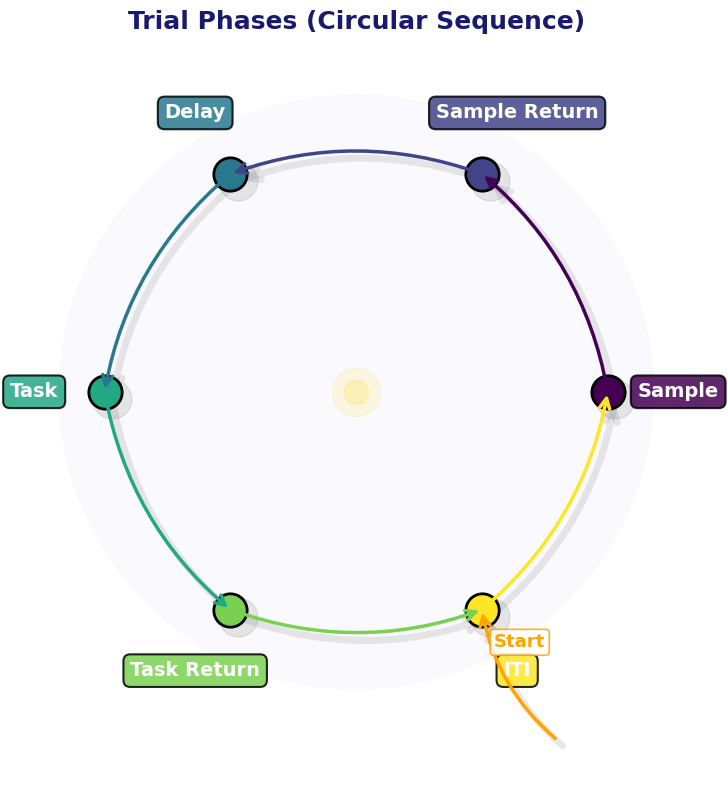

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, FancyArrowPatch
from matplotlib import cm

# Define the phases and their order
phases = [
    "Sample", 
    "Sample Return", 
    "Delay", 
    "Task", 
    "Task Return", 
    "ITI"
]

# Color palette for phases
colors = cm.viridis(np.linspace(0, 1, len(phases)))

# Close the circle by repeating the first phase at the end
phases_circle = phases + [phases[0]]

# Number of phases
n = len(phases)

# Angles for each phase
angles = np.linspace(0, 2 * np.pi, n + 1)

# Circle coordinates
r = 1
x = r * np.cos(angles)
y = r * np.sin(angles)

fig, ax = plt.subplots(figsize=(8,8))
# Draw a subtle background circle
circle_bg = Circle((0,0), r*1.18, color='lavender', alpha=0.18, zorder=0)
ax.add_patch(circle_bg)

# Draw phase nodes with gradient color and shadow
for i in range(n):
    # Shadow
    ax.plot(
        x[i]+0.03, y[i]-0.03, 
        marker='o', markersize=28, 
        color='gray', alpha=0.18, zorder=2
    )
    # Node
    ax.plot(
        x[i], y[i], 
        marker='o', markersize=24, 
        color=colors[i], markeredgewidth=2, markeredgecolor='k', zorder=3
    )

# Annotate each phase with a colored background box
for i, phase in enumerate(phases):
    angle = angles[i]
    label_x = 1.28 * r * np.cos(angle)
    label_y = 1.28 * r * np.sin(angle)
    bbox_props = dict(boxstyle="round,pad=0.35", fc=colors[i], ec="k", lw=1.5, alpha=0.85)
    ax.text(
        label_x, label_y, phase, 
        ha='center', va='center', fontsize=14, fontweight='bold', color='white',
        bbox=bbox_props, zorder=4
    )

# Draw arrows between phases with curvature and shadow
for i in range(n):
    start = (x[i], y[i])
    end = (x[i+1], y[i+1])
    # Shadow arrow
    arrow_shadow = FancyArrowPatch(
        (start[0]+0.03, start[1]-0.03), (end[0]+0.03, end[1]-0.03),
        connectionstyle="arc3,rad=0.18", arrowstyle="->", 
        mutation_scale=22, lw=5, color='gray', alpha=0.18, zorder=1
    )
    ax.add_patch(arrow_shadow)
    # Main arrow
    arrow = FancyArrowPatch(
        start, end,
        connectionstyle="arc3,rad=0.18", arrowstyle="->", 
        mutation_scale=18, lw=2.5, color=colors[i], zorder=5
    )
    ax.add_patch(arrow)

# Add an arrow from outside the cycle into ITI to indicate the cycle starts with ITI
# ITI is the last phase, so its index is n-1
iti_angle = angles[-2]  # angles[n-1]
iti_x = x[-2]
iti_y = y[-2]
# Choose a point outside the circle in the direction of ITI
arrow_length = 0.6
outside_x = (r + arrow_length) * np.cos(iti_angle)
outside_y = (r + arrow_length) * np.sin(iti_angle)
# Draw shadow for the entry arrow
entry_arrow_shadow = FancyArrowPatch(
    (outside_x+0.03, outside_y-0.03), (iti_x+0.03, iti_y-0.03),
    connectionstyle="arc3,rad=-0.18", arrowstyle="->",
    mutation_scale=22, lw=5, color='gray', alpha=0.18, zorder=1
)
ax.add_patch(entry_arrow_shadow)
# Draw main entry arrow (make it orange)
entry_arrow = FancyArrowPatch(
    (outside_x, outside_y), (iti_x, iti_y),
    connectionstyle="arc3,rad=-0.18", arrowstyle="->",
    mutation_scale=18, lw=2.5, color='orange', zorder=6
)
ax.add_patch(entry_arrow)
# Optionally, add a label for the entry arrow (make text and border orange)
ax.text(
    (outside_x + iti_x)/2, (outside_y + iti_y)/2 + 0.13, "Start", 
    ha='center', va='center', fontsize=13, fontweight='bold', color='orange', zorder=7,
    bbox=dict(boxstyle="round,pad=0.22", fc='white', ec='orange', lw=1.2, alpha=0.85)
)

# Add a glowing effect to the center
ax.scatter(0, 0, s=1200, c='gold', alpha=0.12, zorder=0)
ax.scatter(0, 0, s=300, c='gold', alpha=0.18, zorder=0)

# Remove axes for a cleaner look
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.axis('off')
plt.title("Trial Phases (Circular Sequence)", fontsize=18, fontweight='bold', color='midnightblue', pad=24)
plt.tight_layout()
plt.show()
